# Problem Definition
The objective of this task is to classify the iris flowers into 3 classes:
1. Iris-setosa
2. Iis-versicolor
3. Iris-virginica
based on the following attributes:
1. sepal length
2. sepal width
3. petal length
4. petal width
This is part of a supervised classification since the data is labeled

I'll be using KNN, Logistic Regression as well as decision tree to build a predictive model and compare their peroformance using accuracy and confusion matrix

# Importing all Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for classification and preprocessing
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#for deduction and evaluation
from sklearn.metrics import accuracy_score



## Checking the .names file for Dataset info

In [2]:
with open('iris.names', 'r') as f:
    print(f.read())

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

# Loading the Dataset

In [3]:
columns = ["Sepal Length (cm)", "Sepal Width (cm)", "Petal Length (cm)", "Petal Width (cm)", "Flower Class"]
df = pd.read_csv("iris.data", names = columns)

# Exploring the Dataset

In [4]:
with open("bezdekIris.data", 'r') as f:
    print(f.read())

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.6,0.2,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.2,Iris-setosa
5.0,3.2,1.2,0.2,Iris

In [5]:
with open("Index", 'r') as f:      
    print(f.read())

Index of iris

02 Dec 1996      105 Index
08 Mar 1993     4551 iris.data
30 May 1989     2604 iris.names



# Exploring Further

In [6]:
df.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Flower Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.iloc[50:100]

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Flower Class
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor


In [8]:
df.iloc[100:150]

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Flower Class
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


In [9]:
df.describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sepal Length (cm)  150 non-null    float64
 1   Sepal Width (cm)   150 non-null    float64
 2   Petal Length (cm)  150 non-null    float64
 3   Petal Width (cm)   150 non-null    float64
 4   Flower Class       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df["Flower Class"].value_counts()

Flower Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [12]:
df.isnull().sum()     #to check for any undefined or null values

Sepal Length (cm)    0
Sepal Width (cm)     0
Petal Length (cm)    0
Petal Width (cm)     0
Flower Class         0
dtype: int64

### Deduction
There are 50 flowers each

There are no null values.

sepal and petal length and width are independant variables

the flower class is dependent on them

# Data Visualization

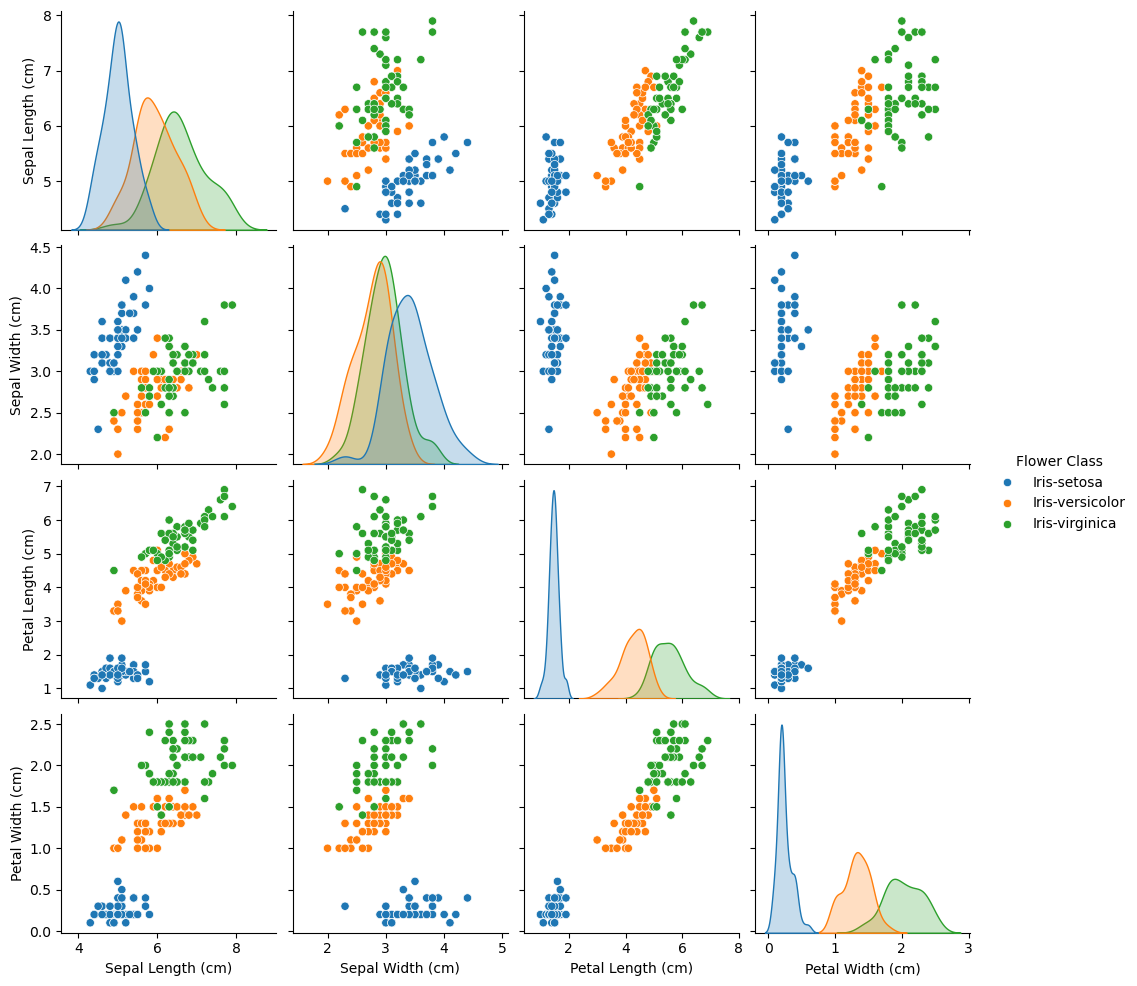

In [13]:
#for pairplot, i used seaborn
sns.pairplot(df, hue="Flower Class")

In [14]:
# data frame filters (pandas)
setosa = df[df["Flower Class"] == "Iris-setosa"]
versicolor = df[df["Flower Class"] == "Iris-versicolor"]
virginica = df[df["Flower Class"] == "Iris-virginica"]

In [ ]:
#for scatter plot, i used matplotlib
# Petal length vs petal width
plt.figure(figsize=(8,6))



plt.scatter(setosa["Petal Length (cm)"], setosa["Petal Width (cm)"], color = "slateblue", label = "Setosa")
plt.scatter(versicolor["Petal Length (cm)"], versicolor["Petal Width (cm)"], color = "purple", label = "Versicolor")
plt.scatter(virginica["Petal Length (cm)"], virginica["Petal Width (cm)"], color = "deeppink", label = "Virginica")

plt.xlabel( "Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

plt.title("Petal Length vs Petal Width")
plt.legend()    #to map colors
plt.grid(True)
plt.show()      #to show the grid

In [ ]:
# sepal length vs sepal width (to show a weak link)

plt.figure(figsize = (8, 6))

plt.scatter(setosa["Sepal Length (cm)"], setosa["Sepal Width (cm)"], color = "slateblue", label = "Setosa")
plt.scatter(versicolor["Sepal Length (cm)"], versicolor["Sepal Width (cm)"], color = "purple", label = "Versicolor")
plt.scatter(virginica["Sepal Length (cm)"], virginica["Sepal Width (cm)"], color = "deeppink", label = "Viriginica")

plt.grid(True)
plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()     #shows the mapping at the top right
plt.show()

### Deduction
Thanks to the main pair plot, i was able to identify what scatter plots gave the most distinct and clear graph for the differentiation of the three iris flowers
I was able to plot the two most different ones:
1. Petal Length vs Petal Width (the best one)
2. Sepal Length vs Sepal Width (the worst one) -> weakest

# Data Preprocessing

In [ ]:
#Preprocessing
# Using numpy to get the labels
Labels = df['Flower Class']
Labels.unique()

In [ ]:
#Continuation of preprocessing
#Label encoding using sklearn
label_enco = LabelEncoder()
Labels  = label_enco.fit_transform(Labels)
np.unique(Labels)  #had to switch up cuz it broke after encoding

In [ ]:
df["Encoded Class"] = Labels
df.head(150)

#### Preparing input and output

In [ ]:
#independent features
x = df.drop(["Flower Class", "Encoded Class"], axis = 1).values    #dropping class from columns

#dependent feature (TARGET)
y = df["Encoded Class"].values

y

# Model Training
## Data Splitting
#### Train Test Split

In [ ]:
# 70 - 30
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 42)

In [ ]:
y_train  #to check

## K-nearest Neighbor

In [ ]:
#building model
knn = KNeighborsClassifier(n_neighbors= 3)

# fitting model on data
knn.fit(X_train, y_train)


In [ ]:
# predicting flower class
knn_predict = knn.predict(X_test)
knn_predict

### Accuracy Score

In [ ]:
accuracy_score(y_test, knn_predict)


### Confusion matrix

In [ ]:
cm = confusion_matrix(y_test, knn_predict)
cm

#### Plotting CM

In [ ]:
sns.heatmap(cm, annot = True, cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")

## Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter= 200)
lr

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr_predict = lr.predict(X_test)
lr_predict

### Accuracy Score

In [ ]:
accuracy_score(y_test, lr_predict)

In [ ]:
# ONLY FOR TESTING PURPOSES
# lr_xtrainpredict = lr.predict(X_train)
# accuracy_score(y_train, lr_xtrainpredict)
# lr_xtrainpredict = lr.predict(X_train)
# accuracy_score(y_train, lr_xtrainpredict)

### Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, lr_predict)
cm

#### Plotting CM

In [ ]:
sns.heatmap(cm, annot = True, cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")

## Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
dt_predict = dt.predict(X_test)
dt_predict

### Accuracy score

In [ ]:
accuracy_score(y_test, dt_predict)

### Confusion Matrix


In [ ]:
cm = confusion_matrix(y_test, dt_predict)
cm

In [ ]:
sns.heatmap(cm, annot = True, cmap = "Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Deduction
all 3 algos gave me accuracy = 1.0

confusion matrix for all of them was[[19, 0, 0], [0, 13, 0], [0, 0, 13]]
means every flower was predicted correctly

Probably because the data was super clean and simple

so yeah, model performance was solid across the board